#AI기초와활용 MediaPipe를 활용한 자세 추정(Pose Estimation) 실습

MediaPipe: 구글에서 주로 인체를 대상으로하는 비전인식기능들을  AI모델 개발과 기계학습까지 마친 상태로 제공하는 서비스.

MediaPipe에서 제공하는 솔루션:https://developers.google.com/mediapipe/solutions/examples

## 0. MediaPipe 설치

In [15]:
!pip install mediapipe

## 1. 데이터 준비

### 1.1. 사람 전신이 보이는 이미지 불러오기

In [16]:
from google.colab import files
uploaded = files.upload()

Saving yoga2.jpg to yoga2.jpg


### 1.2. 데이터 전처리(이미지 데이터 크기 조정)

yoga2.jpg


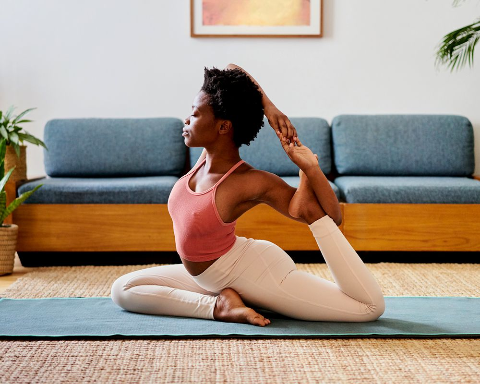

In [17]:
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)

# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded.keys()}
# Preview the images.
for name, image in images.items():
  print(name)
  resize_and_show(image)

## 2. 모델 준비

MediaPipe에서 제공하는 솔루션 중, MediaPipe Pose solution을 사용할 계획.

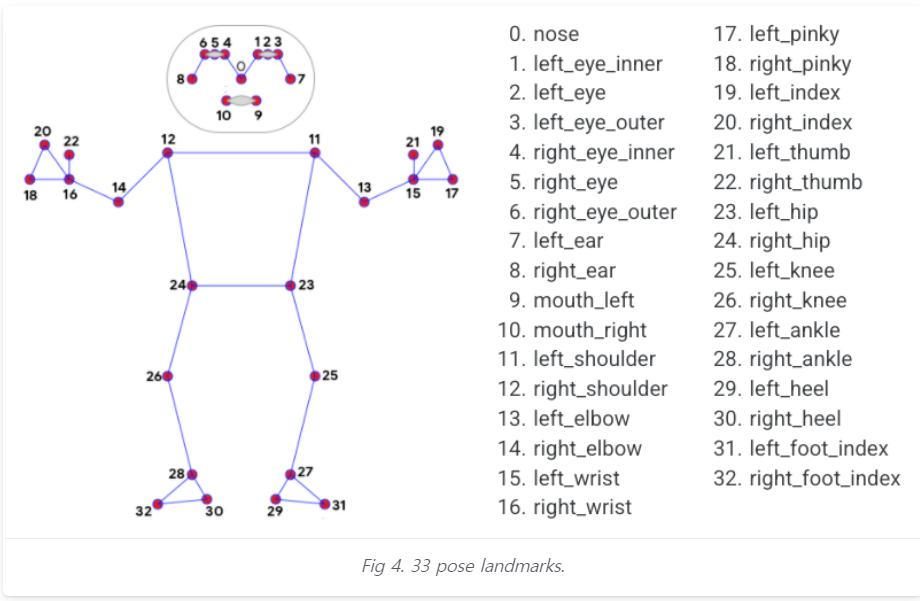

In [18]:
import mediapipe as mp

mp_pose = mp.solutions.pose

# landmark(=관절 포인트)와 그 관절을 이거 선을 그리는 등, 인식한 포즈에 대한 정보를 이미지 위에 그리기 위해 drawing_utils 불러옴.
mp_drawing = mp.solutions.drawing_utils

#mp_pose.Pose 모델 정보 설명. 우리가 직접 조작할 수 있는 하이퍼파라미터(변수)에 대해 알려줌.
help(mp_pose.Pose)

Help on class Pose in module mediapipe.python.solutions.pose:

class Pose(mediapipe.python.solution_base.SolutionBase)
 |  Pose(static_image_mode=False, model_complexity=1, smooth_landmarks=True, enable_segmentation=False, smooth_segmentation=True, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |  
 |  MediaPipe Pose.
 |  
 |  MediaPipe Pose processes an RGB image and returns pose landmarks on the most
 |  prominent person detected.
 |  
 |  Please refer to https://solutions.mediapipe.dev/pose#python-solution-api for
 |  usage examples.
 |  
 |  Method resolution order:
 |      Pose
 |      mediapipe.python.solution_base.SolutionBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, static_image_mode=False, model_complexity=1, smooth_landmarks=True, enable_segmentation=False, smooth_segmentation=True, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |      Initializes a MediaPipe Pose object.
 |      
 |      Args:
 |        static_i

하이퍼파라미터 종류

1. static_image_mode: Whether to treat the input images as a batch of static and possibly unrelated images, or a video stream.

2. model_complexity: Complexity of the pose landmark model: 0, 1 or 2.

3. smooth_landmarks: Whether to filter landmarks across different input images to reduce jitter.

4. enable_segmentation: Whether to predict segmentation mask.

5. smooth_segmentation: Whether to filter segmentation across different input images to reduce jitter.

6. min_detection_confidence: Minimum confidence value ([0.0, 1.0]) for person detection to be considered successful.

7. min_tracking_confidence: Minimum confidence value ([0.0, 1.0]) for the pose landmarks to be considered tracked successfully.

## 3. 모델 적용

Nose coordinates: (395.89303731918335, 247.42584228515625)
Pose landmarks of yoga2.jpg:


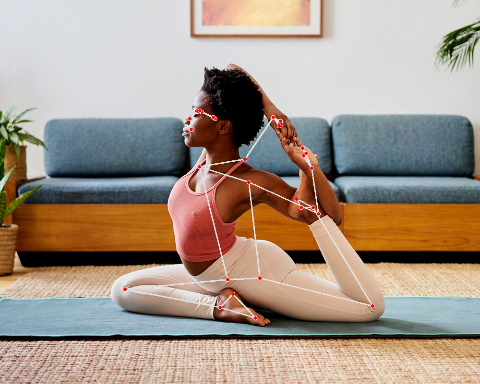

In [20]:
with mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2
    ) as pose:
  for name, image in images.items():
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image)

    image_hight, image_width, _ = image.shape
    if not results.pose_landmarks:
      continue
    #코 좌표 확인하기
    print(
      f'Nose coordinates: ('
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_hight})'
    )

    print(f'Pose landmarks of {name}:')
    annotated_image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,    # Landmark(관절 포인트) 그리기
        mp_pose.POSE_CONNECTIONS  # POSE_CONNECTION(관절끼리 이은 선) 그리기
        )
    resize_and_show(annotated_image)

# 실습과제
1. 전신이 나오는 사진을 준비해 직접 pose estimation 실습하기.
2. 사진의 왼쪽어깨와 오른쪽 어깨의 좌표를 출력하기.
  `help(mp_pose.PoseLandmark)`를 통해 변수명 확인해보기.
3. 사진과 왼쪽어깨와 오른쪽어깨 좌표가 함께 보이게 화면을 캡쳐해 사진형식으로 제출하기.

파일명: [학번]_[이름]_mediapipe

예시

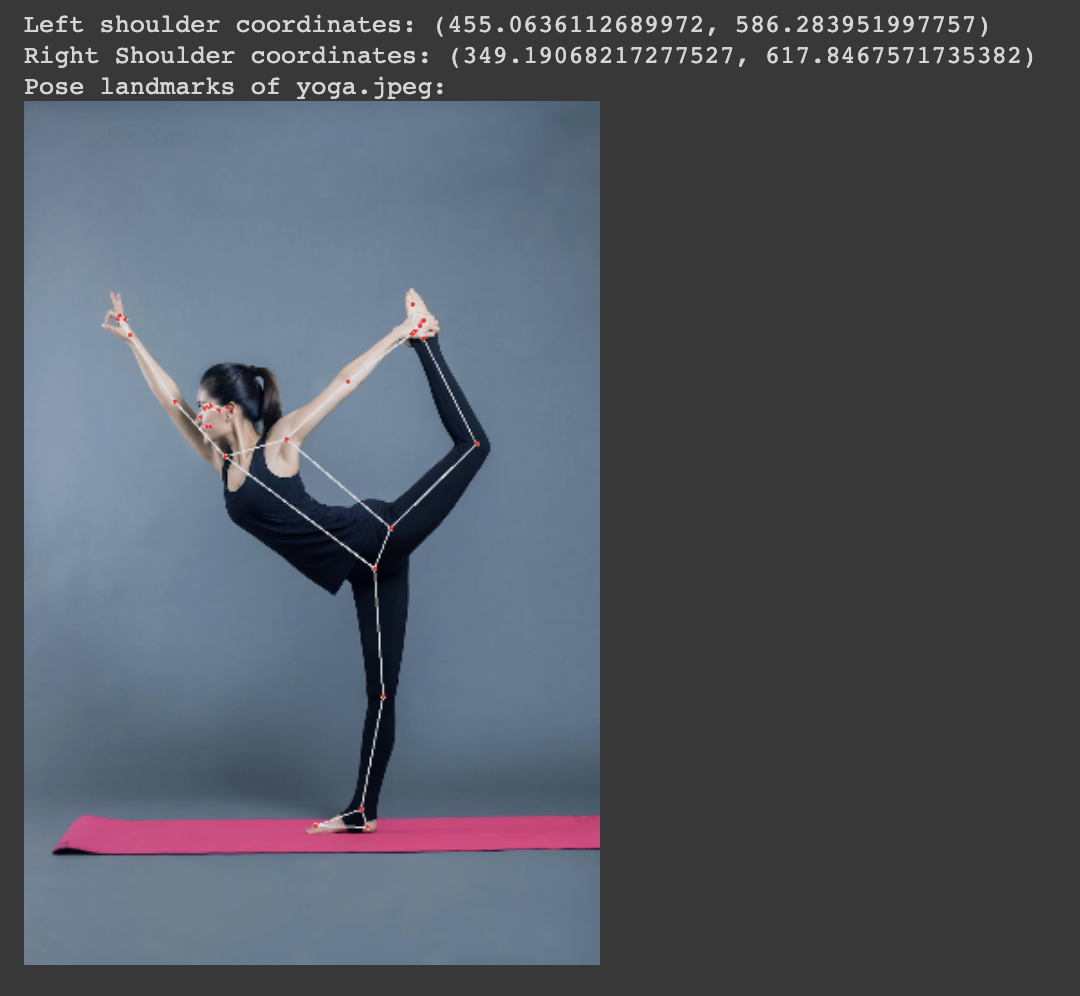